# PISCES Input

This notebook provides a quick look at input netCDF files in PISCES before I start to have my own tracer input.

* _data/NEMO/PISCES_INPUT/data_Alkalini_nomask.nc
* _data/NEMO/PISCES_INPUT/data_DIC_nomask.nc
* _data/NEMO/PISCES_INPUT/ndeposition.orca.nc
* _data/NEMO/PISCES_INPUT/river.orca.nc

# Import modules and tools 

In [3]:
import sys
sys.path.insert(0, '_libs/')

In [4]:
import glob
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
from __future__ import print_function
% matplotlib inline

In [5]:
reload(Nts)

<module 'NEMO_tools' from '_libs/NEMO_tools.pyc'>

In [6]:
TA_name=glob.glob('_data/NEMO/PISCES_INPUT/data_Alkalini_nomask.nc')
print("found file: \n{}".format(TA_name))
TA_obj=nc.Dataset(TA_name[0])
TA_obj.variables.keys()
TA_obj.variables['Alkalini'][:].shape
#TA_obj.variables['time_counter'][:]

found file: 
['_data/NEMO/PISCES_INPUT/data_Alkalini_nomask.nc']


(1L, 31L, 149L, 182L)

In [8]:
DIC_name=glob.glob('_data/NEMO/PISCES_INPUT/data_DIC_nomask.nc')
print("found file: \n{}".format(DIC_name))
DIC_obj=nc.Dataset(DIC_name[0])
DIC_obj.variables.keys()
#DIC_obj.variables['time_counter'][:]

found file: 
['_data/NEMO/PISCES_INPUT/data_DIC_nomask.nc']


[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'DIC']

In [5]:
ND_name=glob.glob('_data/NEMO/PISCES_INPUT/ndeposition.orca.nc')
print("found file: \n{}".format(ND_name))
ND_obj=nc.Dataset(ND_name[0])
ND_obj.variables.keys()

found file: 
['_data/NEMO/PISCES_INPUT/ndeposition.orca.nc']


[u'nav_lon', u'nav_lat', u'time_counter', u'ndep']

In [3]:
rf_name=glob.glob('_data/NEMO/PISCES_INPUT/river.orca.nc')
print("found file: \n{}".format(rf_name))
rf_obj=nc.Dataset(rf_name[0])
rf_obj.variables.keys()

found file: 
['_data/NEMO/PISCES_INPUT/river.orca.nc']


[u'nav_lon',
 u'nav_lat',
 u'time_counter',
 u'riverdic',
 u'riverdoc',
 u'riverpoc']

In [11]:
nav_lon=rf_obj.variables['nav_lon'][:]
nav_lat=rf_obj.variables['nav_lat'][:]
riverdic=rf_obj.variables['riverdic'][:]

In [19]:
riverdic.max()

11.5259

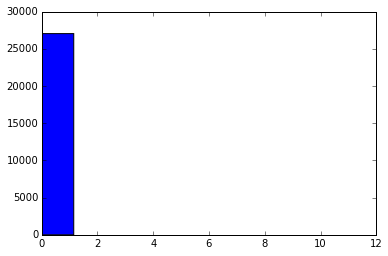

In [17]:
plt.hist(riverdic.flat);

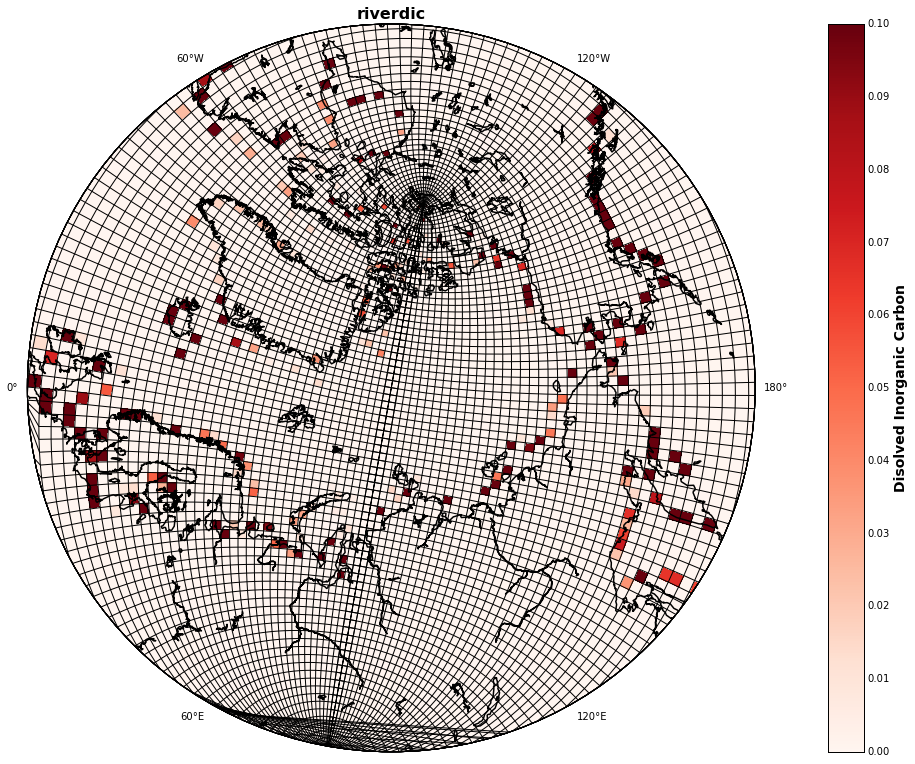

In [27]:
var_name='Disolved Inorganic Carbon'
CMap=plt.cm.Reds
#
fig, ax, proj = Nts.pcolor_Arctic(nav_lon, nav_lat, 50, riverdic[0, :, :], [0, 0.1], CMap, var_name, hit=0)
x, y=proj(nav_lon, nav_lat)
proj.plot(x, y, 'k-')
proj.plot(x.T, y.T, 'k-')
#
title='riverdic'
ax.set_title(title, fontsize=16, fontweight='bold')
fig.set_size_inches(15, 15)
fig.canvas.draw()